<a href="https://colab.research.google.com/github/souban1234/sou12345/blob/master/text%20generation%20using%20lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/gdrive')



Mounted at /gdrive


In [6]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Embedding
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
import string
import requests
from keras.layers import TimeDistributed
from keras.layers import Bidirectional


In [7]:
tokenizer=Tokenizer()
data=open("/gdrive/My Drive/lotr.txt").read()
corpus=data.lower().split("\n")[:1000]
tokenizer.fit_on_texts(corpus)
total_words=len(tokenizer.word_index)+1
print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'a': 3, 'to': 4, 'of': 5, 'he': 6, 'in': 7, 'was': 8, 'i': 9, 'it': 10, 'they': 11, 'on': 12, 'that': 13, 'you': 14, 'said': 15, 'for': 16, 'all': 17, 'had': 18, 'his': 19, 'have': 20, 'not': 21, 'as': 22, 'at': 23, 'with': 24, 'bilbo': 25, 'there': 26, 'is': 27, 'but': 28, 'were': 29, 'this': 30, 'what': 31, 'or': 32, 'up': 33, 'we': 34, 'out': 35, 'like': 36, 'very': 37, 'him': 38, 'gandalf': 39, 'one': 40, 'about': 41, 'if': 42, 'by': 43, 'be': 44, 'so': 45, 'hobbit': 46, 'thorin': 47, 'them': 48, 'door': 49, 'their': 50, 'when': 51, 'good': 52, 'are': 53, 'little': 54, 'me': 55, 'your': 56, 'from': 57, 'no': 58, 'then': 59, 'dwarves': 60, 'went': 61, 'could': 62, 'off': 63, 'after': 64, 'my': 65, 'been': 66, 'now': 67, 'before': 68, 'long': 69, "don't": 70, 'baggins': 71, 'time': 72, 'got': 73, 'down': 74, 'more': 75, 'any': 76, 'would': 77, 'just': 78, 'come': 79, 'go': 80, 'do': 81, 'our': 82, 'some': 83, 'far': 84, 'round': 85, 'without': 86, 'into': 87, 'ov

In [8]:
import pandas as pd
df=pd.DataFrame([tokenizer.word_index])
words=df.columns
words

Index(['the', 'and', 'a', 'to', 'of', 'he', 'in', 'was', 'i', 'it',
       ...
       'rolling', 'kicking', 'whacked', 'branch', 'senses', 'madder',
       'squashed', 'bert's', 'paw', 'body'],
      dtype='object', length=2193)

In [9]:
# The unique characters in the file
vocab = sorted(set(words))
print ('{} unique characters'.format(len(vocab)))
vocab

2193 unique characters


["'",
 "'anything",
 "'ell",
 "'em",
 "'ere",
 "'five",
 "'get",
 "'oo",
 "'thank",
 '10',
 '2',
 '45',
 '6te',
 'a',
 'about',
 'above',
 "abreast'",
 'absolutely',
 'absurd',
 'acceptance',
 'accidentally',
 'according',
 'acquaintance',
 'across',
 'actually',
 'added',
 'addition',
 'advance',
 'adventure',
 'adventures',
 'adventurous',
 'afore',
 'afraid',
 'afresh',
 'after',
 'afternoon',
 'afterwards',
 'again',
 'against',
 'age',
 'ages',
 'ago',
 'agree',
 'ahead',
 'air',
 'alarmed',
 'ale',
 'alive',
 'all',
 'alleys',
 'allow',
 'allowed',
 'almost',
 'along',
 'aloud',
 'already',
 'also',
 'alters',
 'although',
 'altogether',
 'always',
 'am',
 'ambling',
 'among',
 'amusing',
 'an',
 'ancestor',
 'ancestors',
 'ancient',
 'and',
 'angrily',
 'angry',
 'annoyed',
 'annoying',
 'another',
 "another's",
 'answer',
 'answered',
 'answering',
 'any',
 'anybody',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'apologetically',
 'apparently',
 'appea

In [10]:
# creating a mapping from unique characters to indices
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = {i:u for i, u in enumerate(vocab)}

In [30]:
len(vocab)

2193

In [12]:
corpus[0]

'####-special note: '

In [29]:
input_sequences=[]

for line in corpus:
  token_list=tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

print(len(input_sequences))
len(token_list)

11418


18

In [35]:
#passing some words and predicting next word .
train_len = 20 # taking 25 words to predict 26th word..
text_seq = []
for i in range(train_len,len(vocab)):
	seq=vocab[i-train_len:i]
	text_seq.append(seq)
print(' '.join(text_seq[0])) # joining words to form sentences..

' 'anything 'ell 'em 'ere 'five 'get 'oo 'thank 10 2 45 6te a about above abreast' absolutely absurd acceptance


In [14]:
#p
ad sequences
 4 =max([len(seq) for seq in input_sequences])


print(max_sequence_len, total_words)

input_sequences = np.array(tf.keras.preprocessing.sequence.pad_sequences(input_sequences, padding="pre", maxlen=max_sequence_len))

#create predictions and lebels
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

21 2194


In [15]:
input_sequences

array([[   0,    0,    0, ...,    0, 1012,  311],
       [   0,    0,    0, ...,    0,    7,   30],
       [   0,    0,    0, ...,    7,   30, 1013],
       ...,
       [   0,    0,    0, ...,    6,  605,   16],
       [   0,    0,    0, ...,  605,   16,    3],
       [   0,    0,    0, ...,   16,    3,  120]], dtype=int32)

In [16]:
seq_length=xs.shape[1]

print(seq_length)

ys.shape

20


(11418, 2194)

In [17]:
model = Sequential()
model.add(Embedding(input_dim=total_words,output_dim=100,input_length=seq_length))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(96)))
model.add(Dense(1097,activation="relu"))
model.add(Dense(2194,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 100)           219400    
_________________________________________________________________
bidirectional (Bidirectional (None, 20, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 20, 300)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 192)               304896    
_________________________________________________________________
dense (Dense)                (None, 1097)              211721    
_________________________________________________________________
dense_1 (Dense)              (None, 2194)              2409012   
Total params: 3,446,229
Trainable params: 3,446,229
Non-trainable params: 0
______________________________________________

In [18]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [19]:
filepath="weights-improvement-{epoch:02d}-{accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [20]:
history=model.fit(xs,ys,batch_size=32,epochs=100,verbose=1,callbacks=callbacks_list)

Epoch 1/100
357/357 [==============================] - 5s 14ms/step - loss: 6.3380 - accuracy: 0.0532
Epoch 2/100
357/357 [==============================] - 5s 14ms/step - loss: 5.9276 - accuracy: 0.0624
Epoch 3/100
357/357 [==============================] - 5s 14ms/step - loss: 5.7302 - accuracy: 0.0690
Epoch 4/100
357/357 [==============================] - 5s 14ms/step - loss: 5.5328 - accuracy: 0.0836
Epoch 5/100
357/357 [==============================] - 5s 14ms/step - loss: 5.3222 - accuracy: 0.1005
Epoch 6/100
357/357 [==============================] - 5s 14ms/step - loss: 5.1522 - accuracy: 0.1125
Epoch 7/100
357/357 [==============================] - 5s 14ms/step - loss: 4.9916 - accuracy: 0.1202
Epoch 8/100
357/357 [==============================] - 5s 14ms/step - loss: 4.8377 - accuracy: 0.1296
Epoch 9/100
357/357 [==============================] - 5s 14ms/step - loss: 4.6914 - accuracy: 0.1365
Epoch 10/100
357/357 [==============================] - 5s 14ms/step - loss: 4.537

In [40]:
import random
def gen_text(model,tokenizer,seq_length,seed_text,num_gen_words):
    output_text = []
    input_text = seed_text # initial seeding text s
    for i in range(num_gen_words):
        encoded_text = tokenizer.texts_to_sequences([input_text])[0] # it retuns a tuple of item	
        pad_encoded = tf.keras.preprocessing.sequence.pad_sequences([encoded_text],maxlen=seq_length,padding='pre') # as if user add a long or short text then it corrects it.
        pred_word_ind = model.predict_classes(pad_encoded,verbose=0)[0]   #pred prob for each words.
        
        pred_word=tokenizer.index_word[pred_word_ind]
        		
        input_text += ' '+pred_word
        output_text.append(pred_word)
    	
    return ' '.join(output_text)

random.seed(101)
random_pick=random.randint(0,len(text_seq))
random_seed_text=text_seq[random_pick]# choosing randomly words
seed_text=' '.join(random_seed_text)
print(seed_text)

gen_text(model,tokenizer,seq_length,seed_text=seed_text,num_gen_words=1000)


gown grabbed gracious gradually gram grand grandfather grandfather's granduncle grass grateful gravy great greater greedy green greeting grew grey grim


"on the fat house as that gave it the door they came to the pantry to his elbow and they went back to their dark green front door then he strode away just about the time when bilbo saw that morning was an old town of the less trouble you the woods now there was no people left no inns and the roads grew steadily worse not 'get hold of it ' i was given it said the wizard not without a mighty warrior oakenshield himself doing by which you have heard only a quarter of coffee to the dwarves ate and ate and talked and talked and time got into the beer barrels in the chronicles places of the pine trees and the fire died down and the shadows were arming the fire of our noticing him a bit of good quick burgling a silver scarf over which a white beard was not gandalf at all it was a dwarf with a blue beard tucked into a golden belt days that he managed to have got into the fire dwarves can make a fire almost anywhere out of the way of their feet before they arrived and he preferred to ask them h

In [41]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [42]:
filepath="weights-improvement-{epoch:02d}-{accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [43]:
history=model.fit(xs,ys,batch_size=32,epochs=100,verbose=1,callbacks=callbacks_list)

Epoch 1/100
357/357 [==============================] - 5s 14ms/step - loss: 0.2111 - accuracy: 0.9336
Epoch 2/100
357/357 [==============================] - 5s 14ms/step - loss: 0.1868 - accuracy: 0.9372
Epoch 3/100
357/357 [==============================] - 5s 14ms/step - loss: 0.1803 - accuracy: 0.9380
Epoch 4/100
357/357 [==============================] - 5s 14ms/step - loss: 0.1906 - accuracy: 0.9361
Epoch 5/100
357/357 [==============================] - 5s 14ms/step - loss: 0.2210 - accuracy: 0.9298
Epoch 6/100
357/357 [==============================] - 5s 14ms/step - loss: 0.2111 - accuracy: 0.9276
Epoch 7/100
357/357 [==============================] - 5s 14ms/step - loss: 0.2074 - accuracy: 0.9316
Epoch 8/100
357/357 [==============================] - 5s 14ms/step - loss: 0.2078 - accuracy: 0.9318
Epoch 9/100
357/357 [==============================] - 5s 14ms/step - loss: 0.1914 - accuracy: 0.9335
Epoch 10/100
357/357 [==============================] - 5s 14ms/step - loss: 0.184

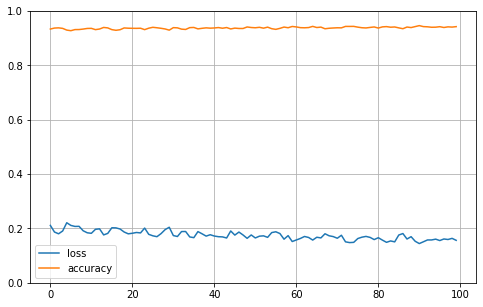

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [45]:
import random
def gen_text(model,tokenizer,seq_length,seed_text,num_gen_words):
    output_text = []
    input_text = seed_text # initial seeding text s
    for i in range(num_gen_words):
        encoded_text = tokenizer.texts_to_sequences([input_text])[0] # it retuns a tuple of item	
        pad_encoded = tf.keras.preprocessing.sequence.pad_sequences([encoded_text],maxlen=seq_length,padding='pre') # as if user add a long or short text then it corrects it.
        pred_word_ind = model.predict_classes(pad_encoded,verbose=0)[0]   #pred prob for each words.
        
        pred_word=tokenizer.index_word[pred_word_ind]
        		
        input_text += ' '+pred_word
        output_text.append(pred_word)
    	
    return ' '.join(output_text)

random.seed(101)
random_pick=random.randint(0,len(text_seq))
random_seed_text=text_seq[random_pick]# choosing randomly words
seed_text=' '.join(random_seed_text)
print(seed_text)

gen_text(model,tokenizer,seq_length,seed_text=seed_text,num_gen_words=1000)


gown grabbed gracious gradually gram grand grandfather grandfather's granduncle grass grateful gravy great greater greedy green greeting grew grey grim


"the sun must have gone down for it and a while he had eaten swept at an adventure some or even he said and the gorgeous row bilbo had just enough wits left when bert they came and a dragon marked in red on the mountain said balin but it will be a big lamp with a red shad he spread a piece of it said bert and after we shan't get through the business till late the usual had sat down in the kitchen nearly down and the shadows were arming the dwarves rushed at the fire more head with the goblins and the moon and talked and talked and time got up trembling and the in rug shaking like a jelly bawl south on the fat and mountains in front of them when loud came a ring at the deep places of their little loose scale of their armour there were lots of dragons in the north in those quick gandalf made a bad wet evening to begin on they even the gandalf's hobbit bred off a silver scarf over which a white mat i do myself you remember the poorest of us had money to spend and to lend a long journey a 